In [1]:
#Importing all librarirs and ensuring plots are displayed inline in the notebook

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
%pylab inline
%matplotlib inline

Populating the interactive namespace from numpy and matplotlib


In [2]:
#Load dataframe and check 
df = pd.read_csv('/Users/z3433848/Desktop/DSI/MiniProject1/wellbeing.csv')
df.head(10)

,Timestamp,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
0,7/7/15,3,2,2,5,0,5,2,0,1,...,7,5,5,1,4,0,5,36 to 50,Female,609.5
1,7/7/15,2,3,4,3,8,10,5,2,2,...,8,2,2,2,3,2,6,36 to 50,Female,655.6
2,7/7/15,2,3,3,4,4,10,3,2,2,...,8,10,2,2,4,8,3,36 to 50,Female,631.6
3,7/7/15,3,3,10,3,10,7,2,5,2,...,5,7,5,1,5,2,0,51 or more,Female,622.7
4,7/7/15,5,1,3,3,10,4,2,4,2,...,7,0,0,2,8,1,5,51 or more,Female,663.9
5,7/8/15,3,2,3,9,10,10,2,3,1,...,8,0,2,2,10,8,3,51 or more,Female,722.3
6,7/8/15,4,2,10,6,10,10,3,5,2,...,7,10,0,2,10,8,10,51 or more,Male,727.2
7,7/9/15,3,4,5,3,5,7,4,0,1,...,6,0,2,2,8,2,2,21 to 35,Female,676.2
8,7/9/15,5,3,6,4,3,3,5,4,1,...,10,0,2,2,10,3,10,21 to 35,Female,702.8
9,7/10/15,4,4,2,6,10,10,0,4,2,...,6,0,0,1,3,8,1,51 or more,Female,634.4


In [6]:
#Dataframe details 
print(df.shape)
print(list(df.columns))


(15972, 24)
['Timestamp', 'FRUITS_VEGGIES', 'DAILY_STRESS', 'PLACES_VISITED', 'CORE_CIRCLE', 'SUPPORTING_OTHERS', 'SOCIAL_NETWORK', 'ACHIEVEMENT', 'DONATION', 'BMI_RANGE', 'TODO_COMPLETED', 'FLOW', 'DAILY_STEPS', 'LIVE_VISION', 'SLEEP_HOURS', 'LOST_VACATION', 'DAILY_SHOUTING', 'SUFFICIENT_INCOME', 'PERSONAL_AWARDS', 'TIME_FOR_PASSION', 'WEEKLY_MEDITATION', 'AGE', 'GENDER', 'WORK_LIFE_BALANCE_SCORE']


In [8]:
#More basic information on the dataframe
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15972 entries, 0 to 15971
Data columns (total 24 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Timestamp                15972 non-null  object 
 1   FRUITS_VEGGIES           15972 non-null  int64  
 2   DAILY_STRESS             15972 non-null  object 
 3   PLACES_VISITED           15972 non-null  int64  
 4   CORE_CIRCLE              15972 non-null  int64  
 5   SUPPORTING_OTHERS        15972 non-null  int64  
 6   SOCIAL_NETWORK           15972 non-null  int64  
 7   ACHIEVEMENT              15972 non-null  int64  
 8   DONATION                 15972 non-null  int64  
 9   BMI_RANGE                15972 non-null  int64  
 10  TODO_COMPLETED           15972 non-null  int64  
 11  FLOW                     15972 non-null  int64  
 12  DAILY_STEPS              15972 non-null  int64  
 13  LIVE_VISION              15972 non-null  int64  
 14  SLEEP_HOURS           

In [9]:
#drop timestamp as it is irrelevant to analysis for this dataset 
df = df.drop(columns =['Timestamp'])

In [20]:
#change datatype for daily stress to integer for better analysis 
df['DAILY_STRESS'] = df['DAILY_STRESS'].astype(int)

In [21]:
#Map Gender and Age to numeric values 
df['GENDER'] = df['GENDER'].map({'Female':0, 'Male':1})
df['AGE'] = df['AGE'].map({'Less than 20':0, '21 to 35':1, '36 to 50':2, '51 or more':3})

In [22]:
#Check changes 
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 15971 entries, 0 to 15971
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   FRUITS_VEGGIES           15971 non-null  int64  
 1   DAILY_STRESS             15971 non-null  int64  
 2   PLACES_VISITED           15971 non-null  int64  
 3   CORE_CIRCLE              15971 non-null  int64  
 4   SUPPORTING_OTHERS        15971 non-null  int64  
 5   SOCIAL_NETWORK           15971 non-null  int64  
 6   ACHIEVEMENT              15971 non-null  int64  
 7   DONATION                 15971 non-null  int64  
 8   BMI_RANGE                15971 non-null  int64  
 9   TODO_COMPLETED           15971 non-null  int64  
 10  FLOW                     15971 non-null  int64  
 11  DAILY_STEPS              15971 non-null  int64  
 12  LIVE_VISION              15971 non-null  int64  
 13  SLEEP_HOURS              15971 non-null  int64  
 14  LOST_VACATION         

In [33]:
df.describe()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
count,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,...,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000,15971.000000
mean,2.922672,2.791685,5.233235,5.508296,5.616179,6.474047,4.000689,2.715171,1.410619,5.745977,...,7.042953,2.898441,2.931000,1.728946,5.711289,3.326279,6.233611,1.602091,0.382756,666.750510
std,1.442739,1.367801,3.311847,2.840287,3.241937,3.086643,2.755912,1.851556,0.491962,2.624179,...,1.199053,3.691867,2.676341,0.444518,3.089540,2.729128,3.016479,0.944426,0.486075,45.021103
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,480.000000
25%,2.000000,2.000000,2.000000,3.000000,3.000000,4.000000,2.000000,1.000000,1.000000,4.000000,...,6.000000,0.000000,1.000000,1.000000,3.000000,1.000000,4.000000,1.000000,0.000000,636.000000
50%,3.000000,3.000000,5.000000,5.000000,5.000000,6.000000,3.000000,3.000000,1.000000,6.000000,...,7.000000,0.000000,2.000000,2.000000,5.000000,3.000000,7.000000,2.000000,0.000000,667.700000
75%,4.000000,4.000000,8.000000,8.000000,9.500000,10.000000,6.000000,5.000000,2.000000,8.000000,...,8.000000,5.000000,4.000000,2.000000,9.000000,5.000000,10.000000,2.000000,1.000000,698.500000
max,5.000000,5.000000,10.000000,10.000000,10.000000,10.000000,10.000000,5.000000,2.000000,10.000000,...,10.000000,10.000000,10.000000,2.000000,10.000000,10.000000,10.000000,3.000000,1.000000,820.200000


In [24]:
#pivot table for BMI range with respect to Age and Gender
df2 = df.pivot_table(values='BMI_RANGE', index=['AGE'], columns=['GENDER'], )
df2.head()

GENDER,0,1
AGE,,
0,1.226291,1.224138
1,1.357809,1.327358
2,1.465046,1.521842
3,1.525535,1.524113


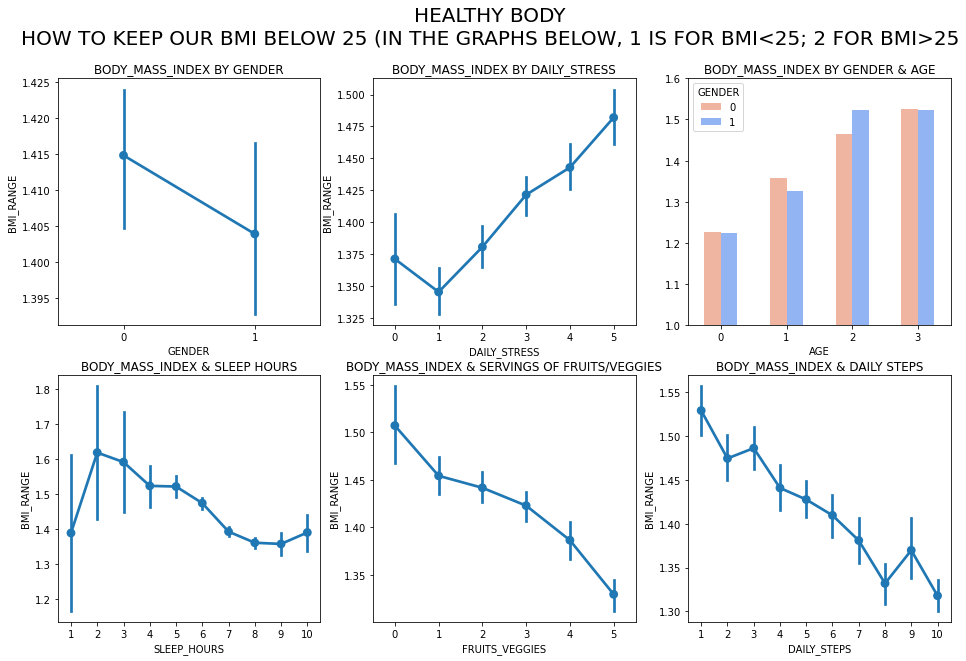

In [32]:
# HEALTHY BODY
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('BODY_MASS_INDEX BY GENDER')
ax[0,1].set_title('BODY_MASS_INDEX BY DAILY_STRESS')
ax[0,2].set_title('BODY_MASS_INDEX BY GENDER & AGE')
ax[1,0].set_title('BODY_MASS_INDEX & SLEEP HOURS')
ax[1,1].set_title('BODY_MASS_INDEX & SERVINGS OF FRUITS/VEGGIES')
ax[1,2].set_title('BODY_MASS_INDEX & DAILY STEPS')

sns.pointplot(x = 'GENDER', y = 'BMI_RANGE',  data=df, ax = ax[0,0])
sns.pointplot(x = 'DAILY_STRESS', y = 'BMI_RANGE',  data=df, ax = ax[0,1])

ax[0,2].set_ylim([1, 1.6])
df2.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,2])
ax[0,2].tick_params(axis='x', rotation=0)

sns.pointplot(x = 'SLEEP_HOURS', y = 'BMI_RANGE',  data=df, ax = ax[1,0])
sns.pointplot(x = 'FRUITS_VEGGIES', y = 'BMI_RANGE', data=df, ax = ax[1,1])
sns.pointplot(x = 'DAILY_STEPS', y = 'BMI_RANGE',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY BODY\nHOW TO KEEP OUR BMI BELOW 25 (IN THE GRAPHS BELOW, 1 IS FOR BMI<25; 2 FOR BMI>25', fontsize=20)
plt.show()

In [34]:
#pivot table for STRESS with respect to Age and Gender
df3 = df.pivot_table(values='DAILY_STRESS', index=['AGE'], columns=['GENDER'], )
df3.head()

GENDER,0,1
AGE,,
0,3.045070,2.347480
1,2.992375,2.569758
2,2.948666,2.799292
3,2.728939,2.418562


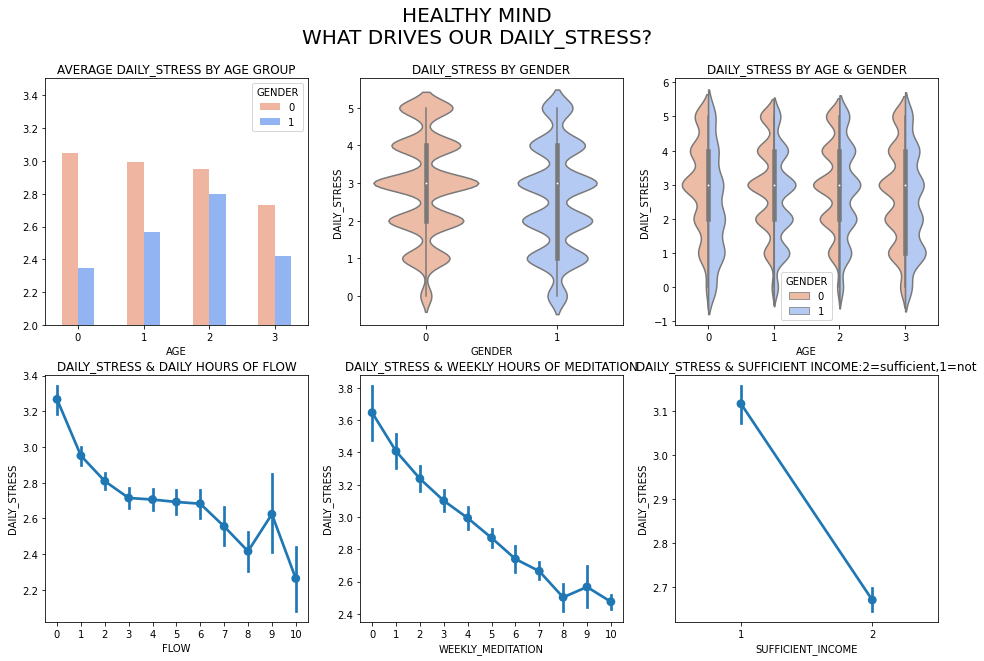

In [36]:
# HEALTHY MIND
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('AVERAGE DAILY_STRESS BY AGE GROUP')
ax[0,1].set_title('DAILY_STRESS BY GENDER')
ax[0,2].set_title('DAILY_STRESS BY AGE & GENDER')
ax[1,0].set_title('DAILY_STRESS & DAILY HOURS OF FLOW')
ax[1,1].set_title('DAILY_STRESS & WEEKLY HOURS OF MEDITATION')
ax[1,2].set_title('DAILY_STRESS & SUFFICIENT INCOME:2=sufficient,1=not')

ax[0,0].set_ylim([2, 3.5])
df3.plot(kind='bar', color=('darksalmon', 'cornflowerblue'), alpha=0.7, ax = ax[0,0])
ax[0,0].tick_params(axis='x', rotation=0)

sns.violinplot(x= 'GENDER',y='DAILY_STRESS', palette='coolwarm_r', data=df, ax = ax[0,1])
sns.violinplot(x = 'AGE', y = 'DAILY_STRESS', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=[0,1,2,3], split = True, ax = ax[0,2])
sns.pointplot(x = 'FLOW', y = 'DAILY_STRESS',  data=df, ax = ax[1,0])
sns.pointplot(x = 'WEEKLY_MEDITATION', y = 'DAILY_STRESS', data=df, ax = ax[1,1])
sns.pointplot(x = 'SUFFICIENT_INCOME', y = 'DAILY_STRESS',  data=df, ax = ax[1,2])

f.suptitle('HEALTHY MIND\nWHAT DRIVES OUR DAILY_STRESS?', fontsize=20)
plt.show()

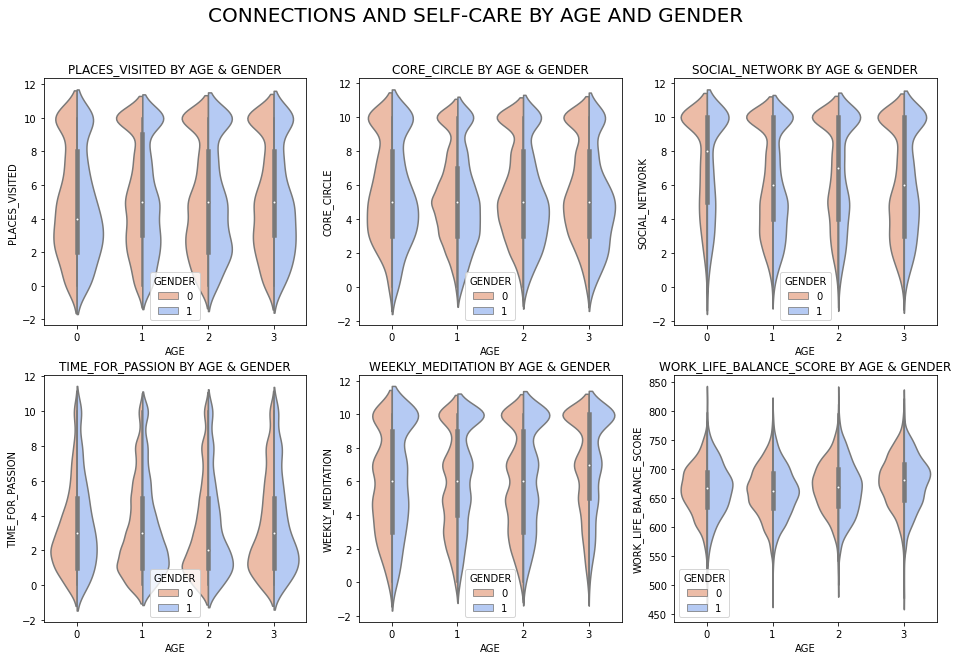

In [38]:
# CONNECTIONS AND SELF-CARE BY AGE AND GENDER 
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('PLACES_VISITED BY AGE & GENDER')
ax[0,1].set_title('CORE_CIRCLE BY AGE & GENDER')
ax[0,2].set_title('SOCIAL_NETWORK BY AGE & GENDER')
ax[1,0].set_title('TIME_FOR_PASSION BY AGE & GENDER')
ax[1,1].set_title('WEEKLY_MEDITATION BY AGE & GENDER')
ax[1,2].set_title('WORK_LIFE_BALANCE_SCORE BY AGE & GENDER')

sns.violinplot(x = 'AGE', y = 'PLACES_VISITED', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=[0,1,2,3], split = True, ax = ax[0,0])

sns.violinplot(x = 'AGE', y = 'CORE_CIRCLE', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=[0,1,2,3], split = True, ax = ax[0,1])
                  
sns.violinplot(x = 'AGE', y = 'SOCIAL_NETWORK', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=[0,1,2,3], split = True, ax = ax[0,2])
                  
sns.violinplot(x = 'AGE', y = 'TIME_FOR_PASSION', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=[0,1,2,3], split = True, ax = ax[1,0])
                  
sns.violinplot(x = 'AGE', y = 'WEEKLY_MEDITATION', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=[0,1,2,3], split = True, ax = ax[1,1])
                  
sns.violinplot(x = 'AGE', y = 'WORK_LIFE_BALANCE_SCORE', hue = 'GENDER', palette='coolwarm_r', data = df,
               order=[0,1,2,3], split = True, ax = ax[1,2])

f.suptitle('CONNECTIONS AND SELF-CARE BY AGE AND GENDER', fontsize=20)
plt.show()

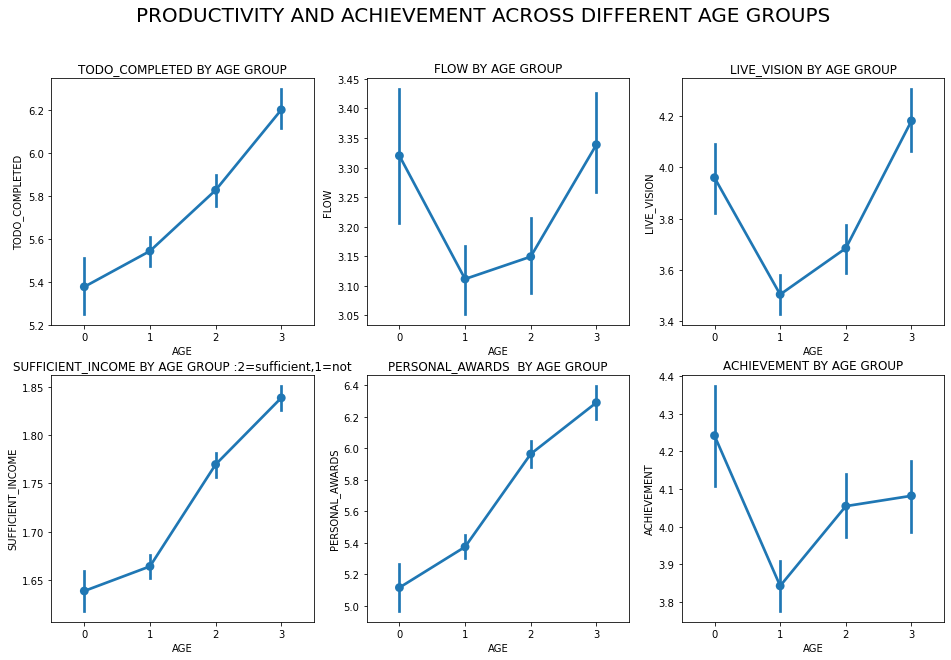

In [48]:
# PRODUCTIVITY AND ACHIEVEMENT ACROSS DIFFERENT AGE GROUPS 
f,ax = plt.subplots(2,3,figsize=(16,10))
ax[0,0].set_title('TODO_COMPLETED BY AGE GROUP')
ax[0,1].set_title('FLOW BY AGE GROUP')
ax[0,2].set_title('LIVE_VISION BY AGE GROUP')
ax[1,0].set_title('SUFFICIENT_INCOME BY AGE GROUP :2=sufficient,1=not')
ax[1,1].set_title('PERSONAL_AWARDS  BY AGE GROUP')
ax[1,2].set_title('ACHIEVEMENT BY AGE GROUP')

sns.pointplot(x = 'AGE', y = 'TODO_COMPLETED',  data=df, ax = ax[0,0])
sns.pointplot(x = 'AGE', y = 'FLOW',  data=df, ax = ax[0,1])
sns.pointplot(x = 'AGE', y = 'LIVE_VISION',  data=df, ax = ax[0,2])
sns.pointplot(x = 'AGE', y = 'SUFFICIENT_INCOME',  data=df, ax = ax[1,0])
sns.pointplot(x = 'AGE', y = 'PERSONAL_AWARDS',  data=df, ax = ax[1,1])
sns.pointplot(x = 'AGE', y = 'ACHIEVEMENT', data=df, ax = ax[1,2])


f.suptitle('PRODUCTIVITY AND ACHIEVEMENT ACROSS DIFFERENT AGE GROUPS', fontsize=20)
plt.show()


In [40]:
#CORRELLATION 
df.corr()

,FRUITS_VEGGIES,DAILY_STRESS,PLACES_VISITED,CORE_CIRCLE,SUPPORTING_OTHERS,SOCIAL_NETWORK,ACHIEVEMENT,DONATION,BMI_RANGE,TODO_COMPLETED,...,SLEEP_HOURS,LOST_VACATION,DAILY_SHOUTING,SUFFICIENT_INCOME,PERSONAL_AWARDS,TIME_FOR_PASSION,WEEKLY_MEDITATION,AGE,GENDER,WORK_LIFE_BALANCE_SCORE
FRUITS_VEGGIES,1.000000,-0.094535,0.254906,0.157785,0.204469,0.106941,0.162901,0.199462,-0.092976,0.227005,...,0.103633,-0.074115,-0.072914,0.148239,0.167823,0.164581,0.196104,0.176864,-0.110211,0.452256
DAILY_STRESS,-0.094535,1.000000,-0.134857,-0.120238,-0.029852,0.020930,-0.110943,-0.037721,0.083110,-0.163727,...,-0.157037,0.196953,0.302669,-0.144573,-0.042535,-0.158141,-0.218660,-0.027380,-0.122585,-0.365399
PLACES_VISITED,0.254906,-0.134857,1.000000,0.255803,0.237981,0.149358,0.257960,0.204597,-0.108054,0.227671,...,0.127251,-0.129167,-0.092114,0.176672,0.269723,0.177892,0.209254,0.004248,-0.042662,0.529673
CORE_CIRCLE,0.157785,-0.120238,0.255803,1.000000,0.337859,0.308773,0.289460,0.221875,-0.025965,0.224380,...,0.066325,-0.080804,-0.066590,0.123117,0.253981,0.227796,0.105240,0.007522,-0.096481,0.507594
SUPPORTING_OTHERS,0.204469,-0.029852,0.237981,0.337859,1.000000,0.316200,0.360077,0.393149,0.038558,0.256698,...,0.007125,-0.018256,-0.048295,0.113340,0.332666,0.327750,0.144307,0.187372,-0.131476,0.548854
SOCIAL_NETWORK,0.106941,0.020930,0.149358,0.308773,0.316200,1.000000,0.249025,0.156792,0.019843,0.204438,...,-0.029662,0.016506,-0.000050,0.123638,0.209041,0.200535,-0.006609,-0.053173,-0.041020,0.412580
ACHIEVEMENT,0.162901,-0.110943,0.257960,0.289460,0.360077,0.249025,1.000000,0.233697,-0.019699,0.304972,...,0.045261,0.000727,-0.044488,0.113779,0.396180,0.368936,0.164713,0.008742,0.000598,0.561241
DONATION,0.199462,-0.037721,0.204597,0.221875,0.393149,0.156792,0.233697,1.000000,0.064543,0.193845,...,-0.001343,-0.022287,-0.046904,0.120585,0.277735,0.193055,0.144197,0.232038,-0.118754,0.458825
BMI_RANGE,-0.092976,0.083110,-0.108054,-0.025965,0.038558,0.019843,-0.019699,0.064543,1.000000,-0.061508,...,-0.098156,0.036683,0.060470,-0.011863,0.019007,-0.006237,-0.078189,0.197100,-0.010766,-0.252026
TODO_COMPLETED,0.227005,-0.163727,0.227671,0.224380,0.256698,0.204438,0.304972,0.193845,-0.061508,1.000000,...,0.113617,-0.078484,-0.135582,0.203841,0.247069,0.274486,0.182571,0.104315,-0.081400,0.545503


In [52]:
# CORRELATION OF FEATURES WITH BMI 

df.corrwith(df['BMI_RANGE']).abs().sort_values()

LIVE_VISION                0.000088
TIME_FOR_PASSION           0.006237
GENDER                     0.010766
SUFFICIENT_INCOME          0.011863
PERSONAL_AWARDS            0.019007
ACHIEVEMENT                0.019699
SOCIAL_NETWORK             0.019843
CORE_CIRCLE                0.025965
FLOW                       0.026761
LOST_VACATION              0.036683
SUPPORTING_OTHERS          0.038558
DAILY_SHOUTING             0.060470
TODO_COMPLETED             0.061508
DONATION                   0.064543
WEEKLY_MEDITATION          0.078189
DAILY_STRESS               0.083110
FRUITS_VEGGIES             0.092976
SLEEP_HOURS                0.098156
PLACES_VISITED             0.108054
DAILY_STEPS                0.131465
AGE                        0.197100
WORK_LIFE_BALANCE_SCORE    0.252026
BMI_RANGE                  1.000000
dtype: float64

In [44]:
# CORRELATION OF FEATURES WITH DAILY STRESS 
df.corrwith(df['DAILY_STRESS']).abs().sort_values()

SOCIAL_NETWORK             0.020930
AGE                        0.027380
SUPPORTING_OTHERS          0.029852
DONATION                   0.037721
PERSONAL_AWARDS            0.042535
DAILY_STEPS                0.065511
BMI_RANGE                  0.083110
FRUITS_VEGGIES             0.094535
ACHIEVEMENT                0.110943
CORE_CIRCLE                0.120238
GENDER                     0.122585
FLOW                       0.129903
LIVE_VISION                0.134155
PLACES_VISITED             0.134857
SUFFICIENT_INCOME          0.144573
SLEEP_HOURS                0.157037
TIME_FOR_PASSION           0.158141
TODO_COMPLETED             0.163727
LOST_VACATION              0.196953
WEEKLY_MEDITATION          0.218660
DAILY_SHOUTING             0.302669
WORK_LIFE_BALANCE_SCORE    0.365399
DAILY_STRESS               1.000000
dtype: float64

In [45]:
df.corrwith(df['WORK_LIFE_BALANCE_SCORE']).abs().sort_values()

GENDER                     0.039911
AGE                        0.119958
SLEEP_HOURS                0.196420
BMI_RANGE                  0.252026
LOST_VACATION              0.266318
DAILY_SHOUTING             0.273143
DAILY_STRESS               0.365399
SUFFICIENT_INCOME          0.403554
SOCIAL_NETWORK             0.412580
WEEKLY_MEDITATION          0.416229
DAILY_STEPS                0.422981
FRUITS_VEGGIES             0.452256
DONATION                   0.458825
LIVE_VISION                0.471319
FLOW                       0.478218
PERSONAL_AWARDS            0.504225
CORE_CIRCLE                0.507594
TIME_FOR_PASSION           0.516979
PLACES_VISITED             0.529673
TODO_COMPLETED             0.545503
SUPPORTING_OTHERS          0.548854
ACHIEVEMENT                0.561241
WORK_LIFE_BALANCE_SCORE    1.000000
dtype: float64

In [46]:
df.corrwith(df['ACHIEVEMENT']).abs().sort_values()

GENDER                     0.000598
LOST_VACATION              0.000727
AGE                        0.008742
BMI_RANGE                  0.019699
DAILY_SHOUTING             0.044488
SLEEP_HOURS                0.045261
DAILY_STRESS               0.110943
SUFFICIENT_INCOME          0.113779
FRUITS_VEGGIES             0.162901
WEEKLY_MEDITATION          0.164713
DAILY_STEPS                0.185946
DONATION                   0.233697
SOCIAL_NETWORK             0.249025
PLACES_VISITED             0.257960
CORE_CIRCLE                0.289460
TODO_COMPLETED             0.304972
LIVE_VISION                0.320680
SUPPORTING_OTHERS          0.360077
TIME_FOR_PASSION           0.368936
FLOW                       0.386577
PERSONAL_AWARDS            0.396180
WORK_LIFE_BALANCE_SCORE    0.561241
ACHIEVEMENT                1.000000
dtype: float64

<AxesSubplot:>

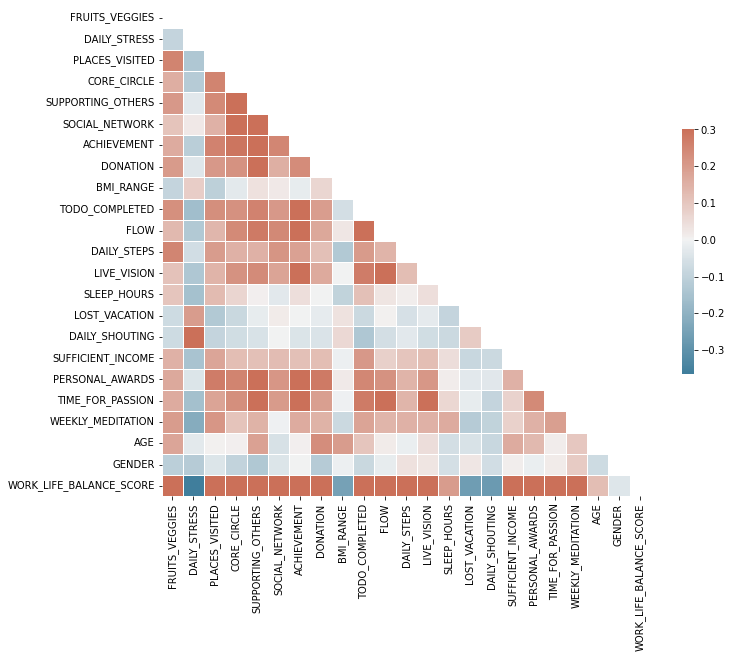

In [47]:
#PLOT DIAGONAL CORRELATION MATRIX 
corr = df.corr()
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})


In [53]:
corr_bmi = df.corrwith(df['BMI_RANGE']).abs().sort_values()

In [54]:
corr_bmi

LIVE_VISION                0.000088
TIME_FOR_PASSION           0.006237
GENDER                     0.010766
SUFFICIENT_INCOME          0.011863
PERSONAL_AWARDS            0.019007
ACHIEVEMENT                0.019699
SOCIAL_NETWORK             0.019843
CORE_CIRCLE                0.025965
FLOW                       0.026761
LOST_VACATION              0.036683
SUPPORTING_OTHERS          0.038558
DAILY_SHOUTING             0.060470
TODO_COMPLETED             0.061508
DONATION                   0.064543
WEEKLY_MEDITATION          0.078189
DAILY_STRESS               0.083110
FRUITS_VEGGIES             0.092976
SLEEP_HOURS                0.098156
PLACES_VISITED             0.108054
DAILY_STEPS                0.131465
AGE                        0.197100
WORK_LIFE_BALANCE_SCORE    0.252026
BMI_RANGE                  1.000000
dtype: float64

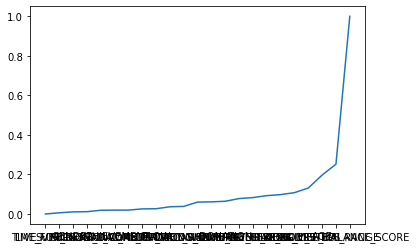

In [58]:
plt.plot(corr_bmi)